Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4679.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4679.jpg


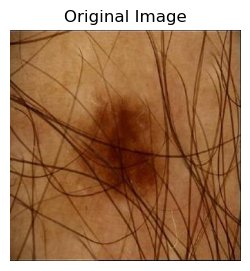

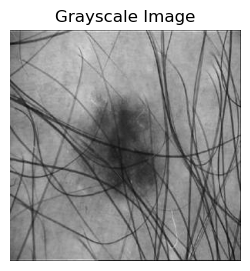

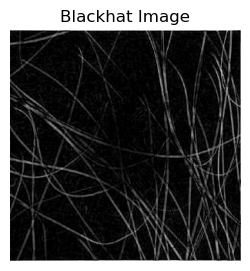

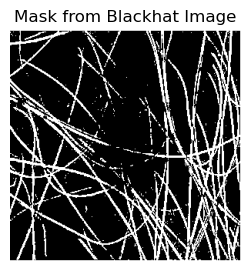

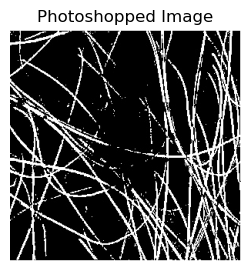

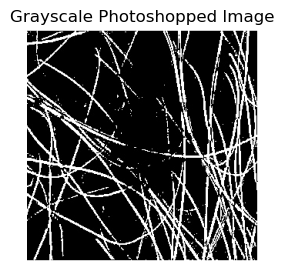

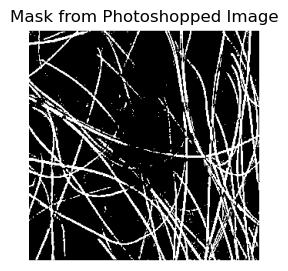

PSNR: 21.17
MSE: 496.36
SSIM: 0.9514
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5176.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5176.jpg


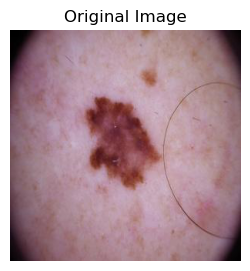

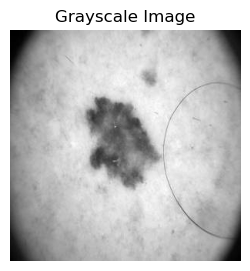

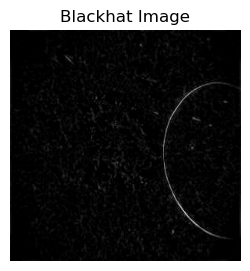

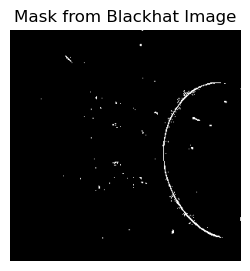

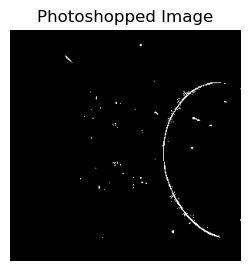

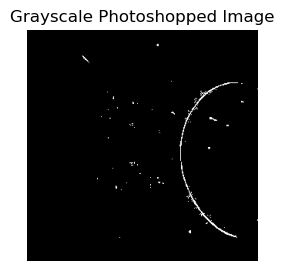

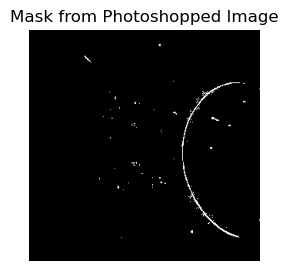

PSNR: 30.20
MSE: 62.13
SSIM: 0.9693
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5238.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5238.jpg


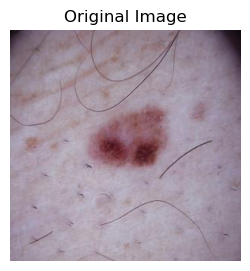

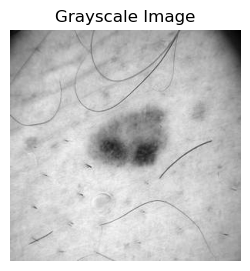

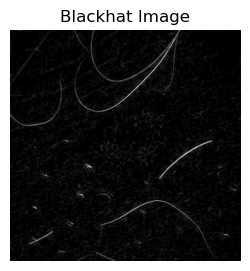

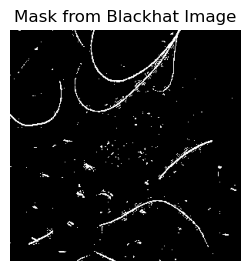

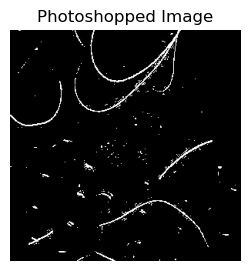

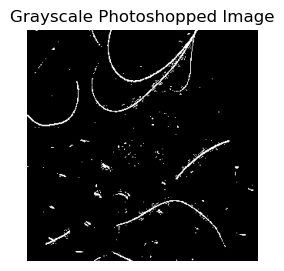

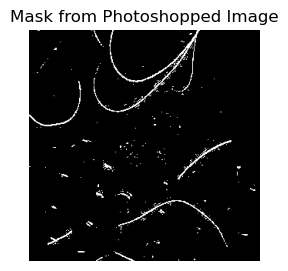

PSNR: 25.24
MSE: 194.35
SSIM: 0.9323
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5089.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5089.jpg


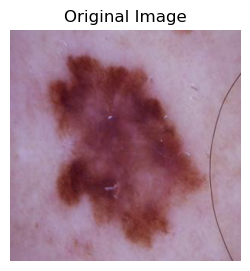

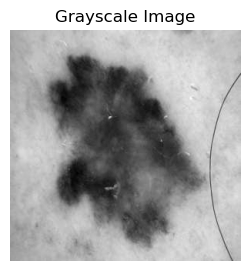

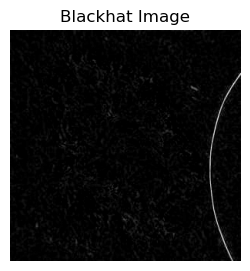

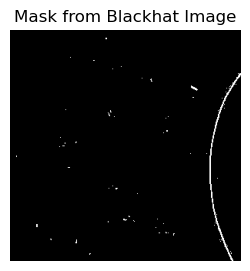

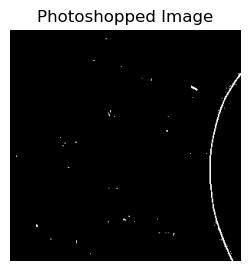

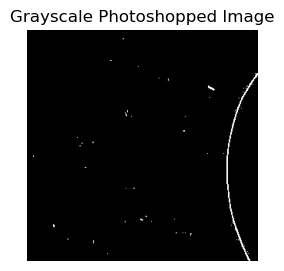

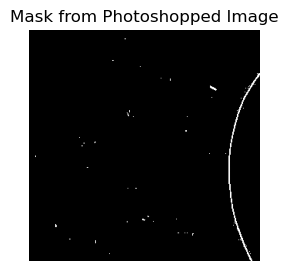

PSNR: 33.01
MSE: 32.51
SSIM: 0.9789
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5066.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5066.jpg


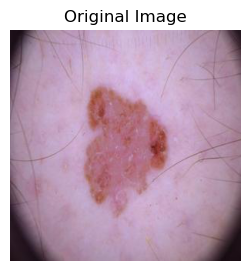

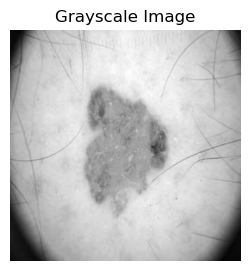

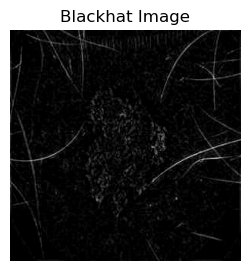

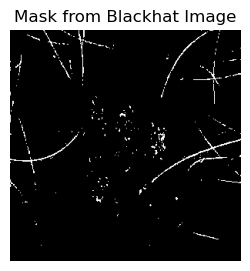

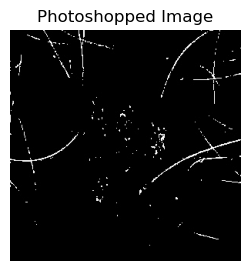

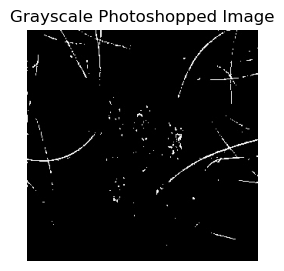

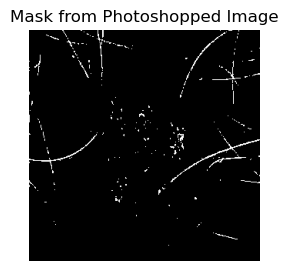

PSNR: 25.44
MSE: 185.68
SSIM: 0.9446
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4770.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4770.jpg


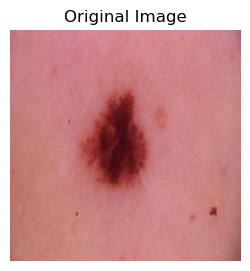

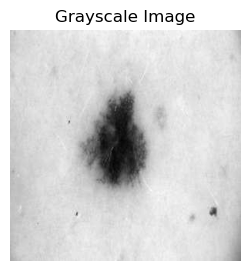

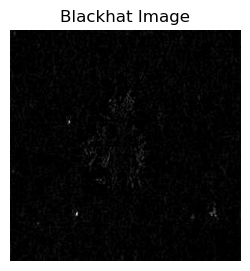

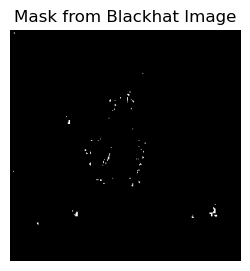

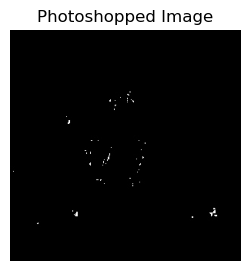

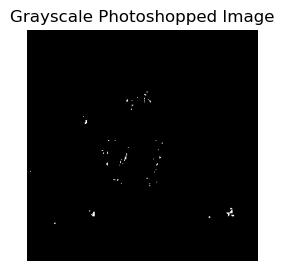

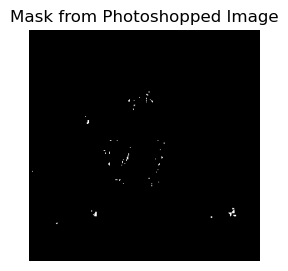

PSNR: 32.73
MSE: 34.68
SSIM: 0.9805
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4822.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4822.jpg


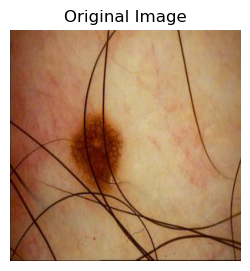

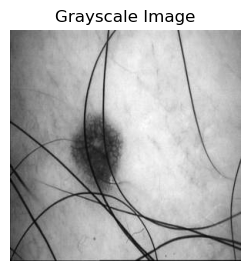

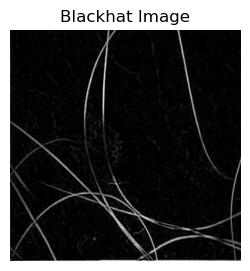

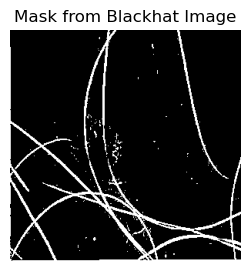

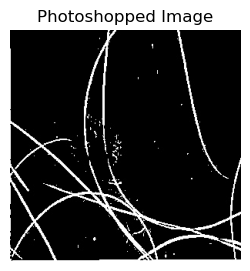

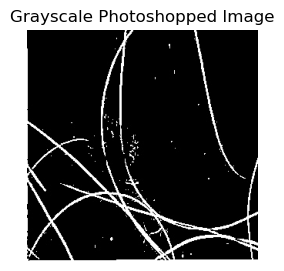

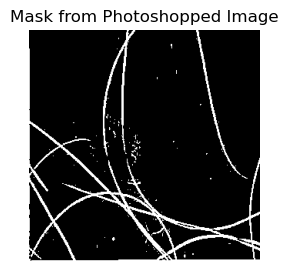

PSNR: 25.74
MSE: 173.40
SSIM: 0.9710
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4808.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4808.jpg


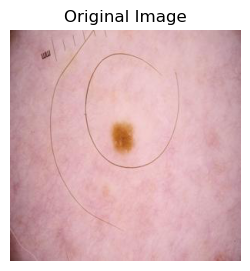

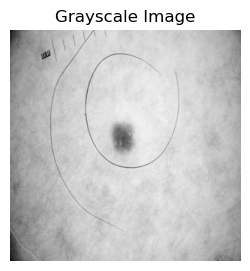

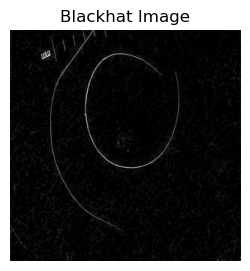

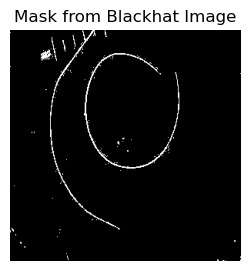

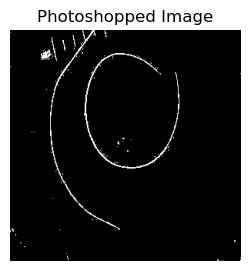

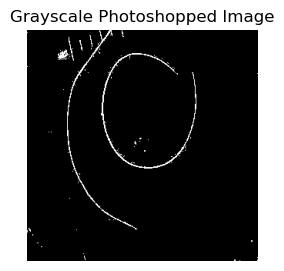

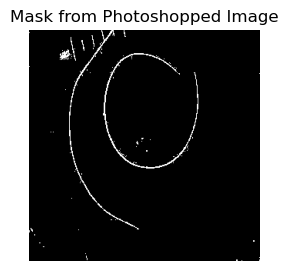

PSNR: 30.79
MSE: 54.19
SSIM: 0.9851
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5336.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5336.jpg


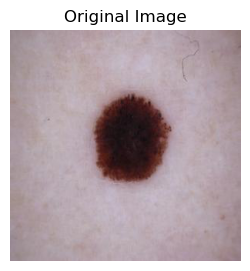

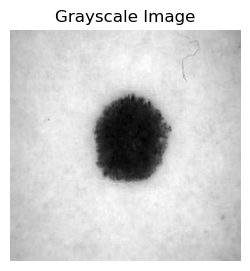

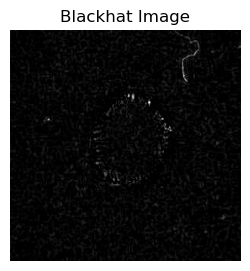

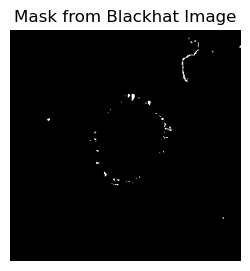

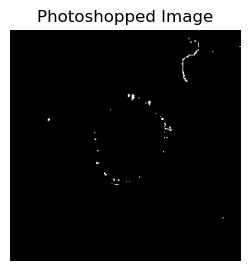

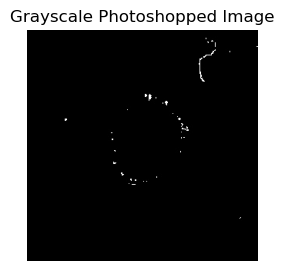

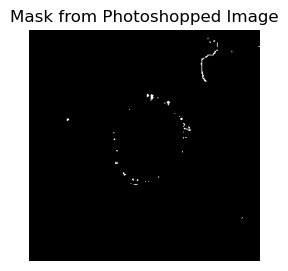

PSNR: 32.64
MSE: 35.40
SSIM: 0.9859
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4992.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4992.jpg


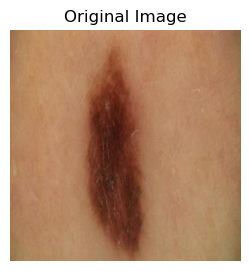

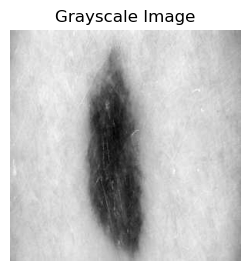

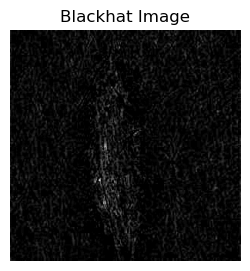

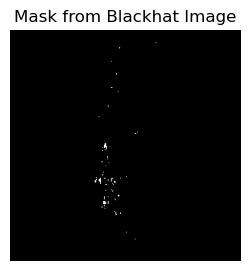

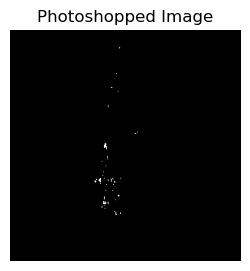

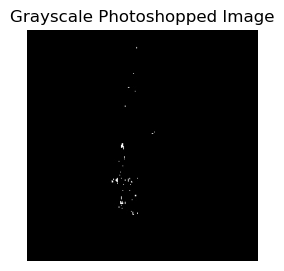

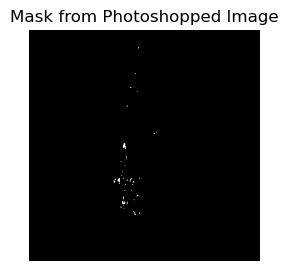

PSNR: 34.77
MSE: 21.68
SSIM: 0.9857
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_5327.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_5327.jpg


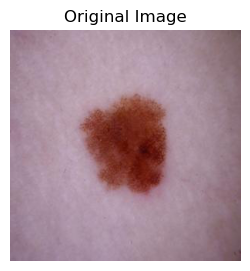

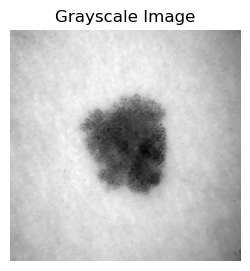

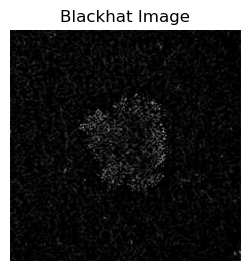

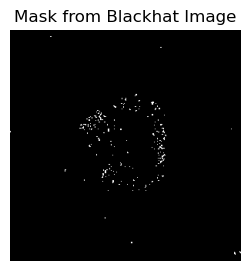

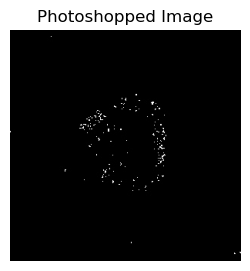

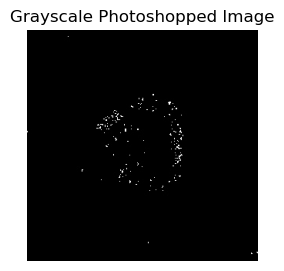

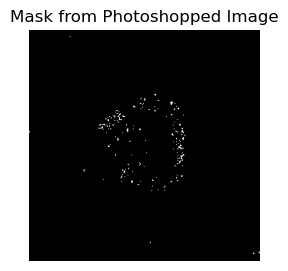

PSNR: 30.35
MSE: 59.97
SSIM: 0.9722
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4775.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4775.jpg


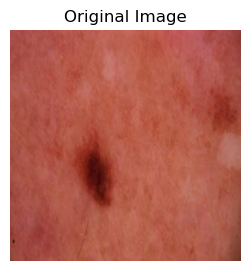

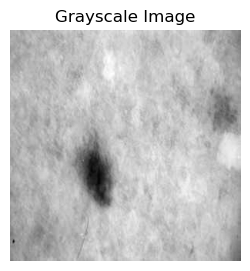

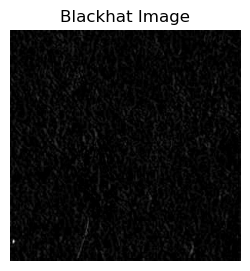

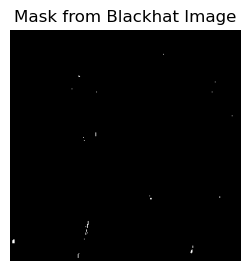

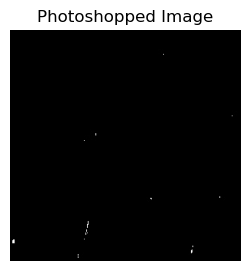

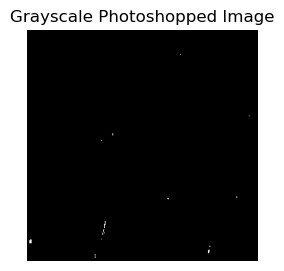

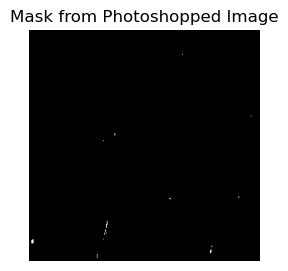

PSNR: 37.24
MSE: 12.28
SSIM: 0.9890
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4674.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4674.jpg


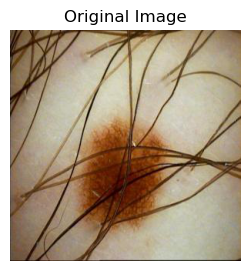

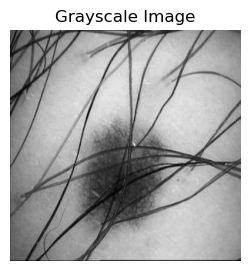

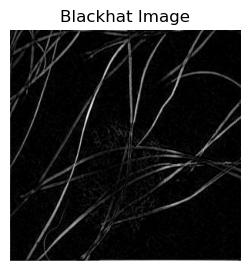

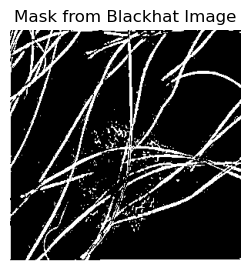

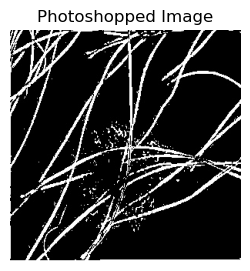

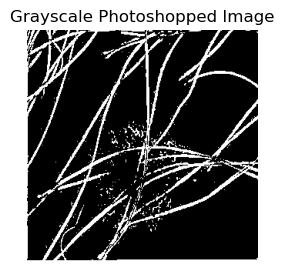

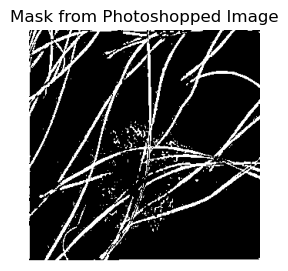

PSNR: 22.88
MSE: 335.24
SSIM: 0.9648
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4702.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4702.jpg


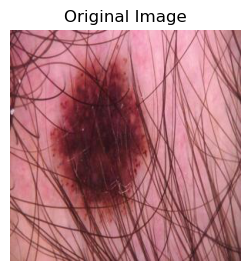

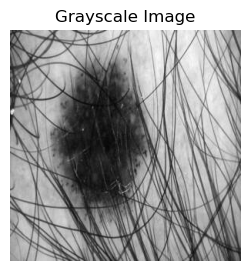

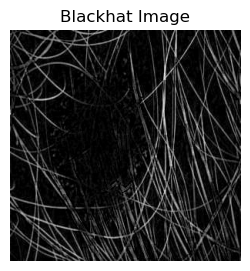

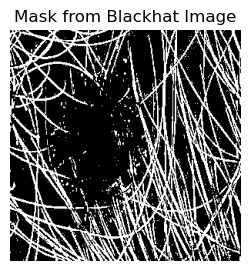

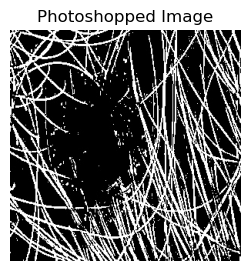

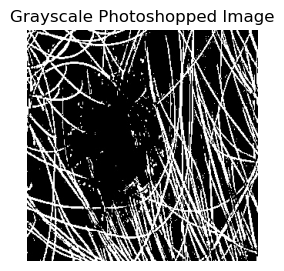

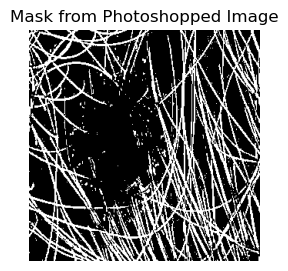

PSNR: 20.26
MSE: 611.96
SSIM: 0.9520
Processing image: /Users/hirunifernando/Desktop/Evaluation/original/melanoma_4850.jpg
Using photoshopped image: /Users/hirunifernando/Desktop/Evaluation/Photoshopped/melanoma_4850.jpg


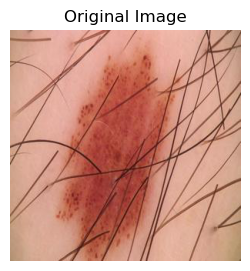

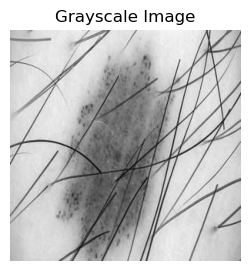

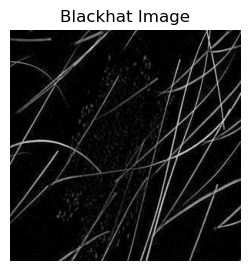

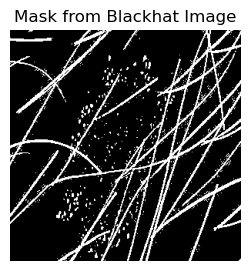

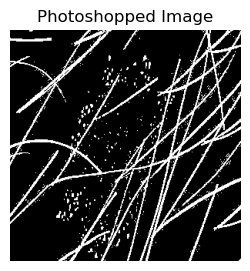

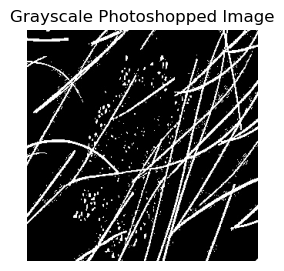

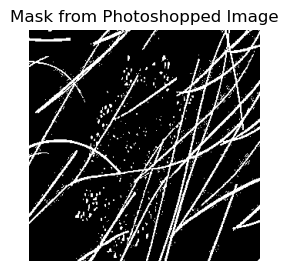

PSNR: 22.62
MSE: 355.47
SSIM: 0.9628


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.metrics import peak_signal_noise_ratio as compare_psnr, structural_similarity as compare_ssim, mean_squared_error as compare_mse

# Display function
def display_image(title, image, is_gray=False):
    if image is None:
        print(f"Error: {title} is None")
        return
    plt.figure(figsize=(3, 3))
    if is_gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Save image function
def save_image(image, path):
    cv2.imwrite(path, image)

# Calculate SSIM with correct window size
def calculate_ssim(original, inpainted):
    win_size = min(11, min(original.shape))  # Maximum window size is 11 or smaller of image dimensions
    if win_size % 2 == 0:
        win_size += 1  # Ensure window size is odd
    return compare_ssim(original, inpainted, win_size=win_size, multichannel=True)

# Process a single image and evaluate PSNR, MSE, and SSIM
def process_image(image_path, photoshopped_path, output_path):
    # Load the original image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return
    display_image("Original Image", image)
    
    # Convert to grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image("Grayscale Image", grayscale, is_gray=True)
    
    # Apply blackhat morphological operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    blackhat = cv2.morphologyEx(grayscale, cv2.MORPH_BLACKHAT, kernel)
    display_image("Blackhat Image", blackhat, is_gray=True)
    
    # Create a binary mask from the blackhat image
    _, mask = cv2.threshold(blackhat, 15, 255, cv2.THRESH_BINARY)
    display_image("Mask from Blackhat Image", mask, is_gray=True)

    # Save mask image
    mask_image_path = os.path.join(output_path, 'mask.png')
    save_image(mask, mask_image_path)
    
    # Load the photoshopped image
    if not os.path.isfile(photoshopped_path):
        print(f"Error: Photoshopped image not found at {photoshopped_path}")
        return
    
    photoshopped_image = cv2.imread(photoshopped_path)
    if photoshopped_image is None:
        print(f"Error: Unable to load photoshopped image {photoshopped_path}")
        return
    display_image("Photoshopped Image", photoshopped_image)
    
    # Convert photoshopped image to grayscale
    grayscale_photoshopped = cv2.cvtColor(photoshopped_image, cv2.COLOR_BGR2GRAY)
    display_image("Grayscale Photoshopped Image", grayscale_photoshopped, is_gray=True)
    
    # Create a binary mask from the grayscale photoshopped image
    _, mask_photoshopped = cv2.threshold(grayscale_photoshopped, 15, 255, cv2.THRESH_BINARY)
    display_image("Mask from Photoshopped Image", mask_photoshopped, is_gray=True)
    
    # Save mask photoshopped image
    mask_photoshopped_image_path = os.path.join(output_path, 'mask_photoshopped.png')
    save_image(mask_photoshopped, mask_photoshopped_image_path)

    # Calculate PSNR
    psnr_value = compare_psnr(mask, mask_photoshopped)
    print(f"PSNR: {psnr_value:.2f}")

    # Calculate MSE
    mse_value = compare_mse(mask, mask_photoshopped)
    print(f"MSE: {mse_value:.2f}")

    # Calculate SSIM
    ssim_value = calculate_ssim(mask, mask_photoshopped)
    print(f"SSIM: {ssim_value:.4f}")

# Process all images in a directory
def process_images(input_dir, photoshopped_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_dir, filename)
            photoshopped_path = os.path.join(photoshopped_dir, filename)
            image_output_dir = os.path.join(output_dir, filename.split('.')[0])
            if not os.path.exists(image_output_dir):
                os.makedirs(image_output_dir)
            print(f"Processing image: {image_path}")
            print(f"Using photoshopped image: {photoshopped_path}")
            process_image(image_path, photoshopped_path, image_output_dir)

# Define input and output directories
input_directory = '/Users/hirunifernando/Desktop/Evaluation/original'
photoshopped_directory = '/Users/hirunifernando/Desktop/Evaluation/Photoshopped'
output_directory = '/Users/hirunifernando/Desktop/Evaluation/ImprovedResult1'

# Process all images in the input directory and save the results to the output directory
process_images(input_directory, photoshopped_directory, output_directory)
